## Mount Google Drive
This is not necessary, **please modify the path** if you need to use this

In [1]:
from google.colab import drive
import os

drive.mount('/content/drive')

notebook_path = r"/content/drive/MyDrive/School/ML/LabEnhancement"
os.chdir(notebook_path)
!pwd

Mounted at /content/drive
/content/drive/MyDrive/School/ML/LabEnhancement


### What is Principal Component Analysis (PCA)
In 1901, mathematician Karl Pearson developed the Principal Component Analysis (PCA) approach.  Using PCA, a data set's dimensionality can be decreased by finding a new set of variables that are smaller than the original set.  PCA works under the requirement that while mapping data from a higher dimensional space to data in a lower dimensional space, the variance of the data in the lower dimensional space should be as high as possible.

### What are the benefits of PCA?
It is an effective method for simplifying data, PCA helps to improve performance, and enable easier visualization. PCA aids in feature selection by identifying the most important variables in large datasets. It also addresses multicollinearity issues by creating uncorrelated components and helps reduce noise by discarding low-variance components, enhancing the signal-to-noise ratio. Moreover, PCA reduce storage requirements and speeding up processing as it represents data with fewer components. In addition, PCA facilitates data visualization by projecting high-dimensional data into two or three dimensions. Lastly, PCA helps detect outliers by identifying data points with large deviations in the principal component space.

### What are the limitations of PCA?
PCA has several limitations that can affects its effectiveness. First, the principal components are linear combinations of the original variables, making them difficult to interpret in terms of the original data. Besides, PCA is sensitive to data scaling, so proper normalization is very important in order to get accurate results. Not only that, it can lead to information loss, as reducing variables may omit important details. This depends on the number of components retained. Additionally, PCA assumes linear relationships, making it unsuitable for datasets with significant nonlinear interactions. Lastly, for large datasets, the computational cost of PCA can be high. On the other hand, it may result in overfitting if the dataset is small or too many components are used.





### Mathematical Concepts


In [2]:
# Sample data with 4 features, values ranging from 1 to 20
data = {
    'Feature1': [5, 14, 9, 16, 3, 11, 18, 8, 2, 7],
    'Feature2': [12, 6, 13, 1, 19, 4, 15, 17, 10, 20],
    'Feature3': [8, 20, 14, 18, 10, 6, 17, 15, 3, 12],
    'Feature4': [7, 3, 9, 16, 5, 19, 2, 13, 14, 4]
}

**Variance** is a measurement value used to determine how dispersed the data is with respect to the mean or average value of the data set. It is employed to determine the dataset's data distribution and the degree to which values deviate from the mean.

 Variance Formula

The variance $\sigma^2\$ is calculated as:

$$
\sigma^2 = \frac{\sum (x_i - \mu)^2}{n}
$$

Where:
- $x_i$ are the individual data points,
- $\mu$ is the mean of the data,
- $n$ is the total number of data points.

**Mean** is the average of a set of data, calculated by adding all the numbers together and dividing by the total number of numbers.

 Mean Formula

The mean $\mu\$ of a feature is calculated as:

$$
\mu = \frac{\sum x_i}{n}
$$

Where:
- $x_i$ are the values of the feature,
- $n$ is the number of values.


Example: Variance Calculation for Feature1

1. Compute the mean:

$$
\mu_{Feature1} = \frac{5 + 14 + 9 + 16 + 3 + 11 + 18 + 8 + 2 + 7}{10} = 9.3
$$

2. Compute variance:

$$
\sigma^2_{Feature1} = \frac{(5 - 9.3)^2 + (14 - 9.3)^2 + (9 - 9.3)^2 + (16 - 9.3)^2 + (3 - 9.3)^2 + (11 - 9.3)^2 + (18 - 9.3)^2 + (8 - 9.3)^2 + (2 - 9.3)^2 + (7 - 9.3)^2}{10} = 26.41
$$


**Covariance** shows how two variables change together. It shows if two variables increase or decrease in response to changes in one.

Covariance Formula

The covariance between two features \(X\) and \(Y\) is calculated as:

$$
\text{Cov}(X, Y) = \frac{\sum (X_i - \mu_X)(Y_i - \mu_Y)}{n}
$$

Where:
- $X_i$ and $Y_i$ are the individual data points of feature $X$ and feature $Y$.
- $\mu_X$ and $\mu_Y$ are the means of $X$ and $Y$.
- $n$ is the total number of data points.


Example: Covariance between Feature1 and Feature2

1. Compute the mean of Feature1:

$$
\mu_{Feature1} = \frac{5 + 14 + 9 + 16 + 3 + 11 + 18 + 8 + 2 + 7}{10} = 9.3
$$

2. Compute the mean of Feature2:

$$
\mu_{Feature2} = \frac{12 + 6 + 13 + 1 + 19 + 4 + 15 + 17 + 10 + 20}{10} = 11.7
$$

3. Compute covariance:

$$
\text{Cov}(Feature1, Feature2) = \frac{(5 - 9.3)(12 - 11.7) + (14 - 9.3)(6 - 11.7) + \dots + (7 - 9.3)(20 - 11.7)}{10}
$$


## 1.0 Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 2.0 Why we need PCA

Before we look into real-world dataset, lets use simple sample data to understand why PCA is needed in Machine Learning.

First, we generate a sample dataset which values range from 1 to 20, and with 4 columns (features).

In [4]:
# Sample data with 4 features, values ranging from 1 to 20
data = {
    'Feature1': [5, 14, 9, 16, 3, 11, 18, 8, 2, 7],
    'Feature2': [12, 6, 13, 1, 19, 4, 15, 17, 10, 20],
    'Feature3': [8, 20, 14, 18, 10, 6, 17, 15, 3, 12],
    'Feature4': [7, 3, 9, 16, 5, 19, 2, 13, 14, 4]
}

df = pd.DataFrame(data)

print(df)


   Feature1  Feature2  Feature3  Feature4
0         5        12         8         7
1        14         6        20         3
2         9        13        14         9
3        16         1        18        16
4         3        19        10         5
5        11         4         6        19
6        18        15        17         2
7         8        17        15        13
8         2        10         3        14
9         7        20        12         4


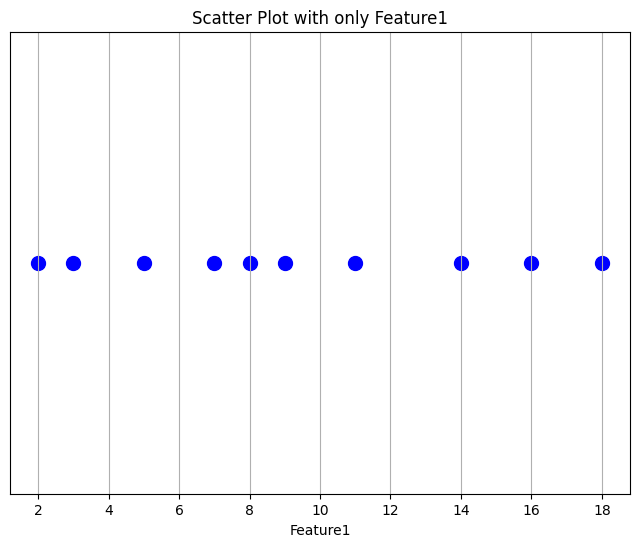

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Feature1'], np.zeros_like(df['Feature1']), c='b', marker='o', s=100)
plt.xlabel('Feature1')
plt.yticks([])
plt.title('Scatter Plot with only Feature1')
plt.grid(True)
plt.show()

If we want to see how the data relates with 1 feature, it is very easy. We just plot the data into a number line. In the graph shown above, we can observe there are 6 data points (object) that have relatively lower values, which are below 10, and 4 data points have relatively higher values, which are above 10.

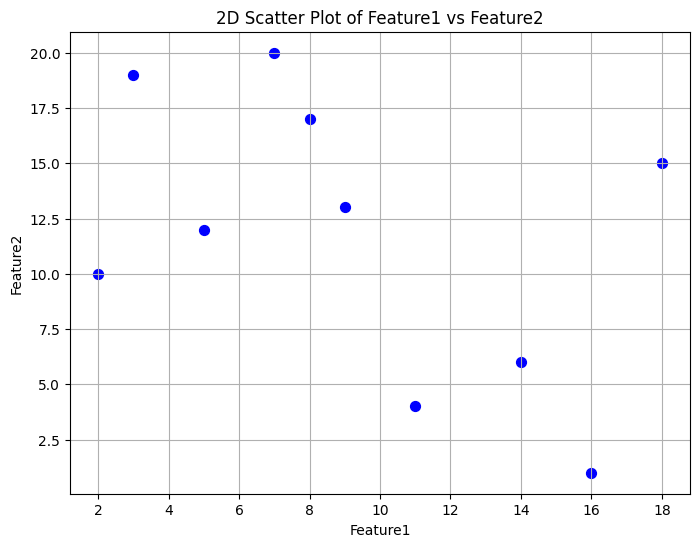

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Feature1'], df['Feature2'], c='b', marker='o', s=50)

plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('2D Scatter Plot of Feature1 vs Feature2')
plt.grid(True)
plt.show()

While for graphs using 2 features and 3 features, we can have 2D graph and 3D graph. In the 2D scatter plot, we can see there are 2 groups of data being separated. This separation occurs because Feature 1 influences the distribution along the x-axis, while Feature 2 affects the positioning along the y-axis. When plotting with two features, the relationship between them becomes apparent, allowing us to visually distinguish patterns or clusters within the dataset.

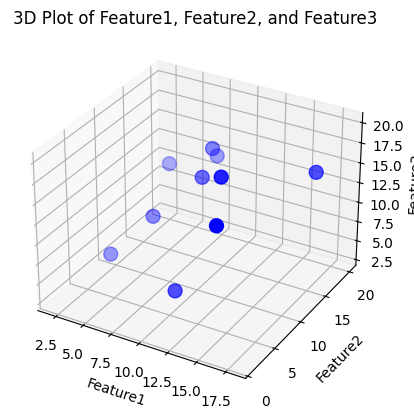

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Feature1'], df['Feature2'], df['Feature3'], c='b', marker='o', s=100)

ax.set_xlabel('Feature1')
ax.set_ylabel('Feature2')
ax.set_zlabel('Feature3')

plt.title('3D Plot of Feature1, Feature2, and Feature3')
plt.show()


In the 3D scatter plot, the concept is similar to the 2D scatter plot, but now Feature 3 comes into play, affecting the depth (near and far). Points that are further away are represented with a lighter color, while those that are closer are displayed in a darker color, providing an intuitive way to visualize the third dimension and its impact on the distribution of the data.


Now, the challenge arises when we want to **visualize datasets with four or more features**. Since it is no longer possible to represent all features on a 3D plot, we need to explore alternative techniques. For datasets with more than three features, **reduction methods like PCA (Principal Component Analysis)**  become valuable tools. PCA helps project high-dimensional data onto lower-dimensional spaces, making it easier to visualize and interpret complex datasets.

## 3.0 How PCA works
We will show the concept of how PCA works, starting with finding the **best fitting line for PC1** using 2D scatter plot with 2 features for simple illustration.



### Step 1: Centering the data
First, we center the data so that the center of data is on top of the origin of the graph. The position of all the points are all the same with the 2D scatter plot shown before, just that the whole graph are now centered at the origin of the graph.

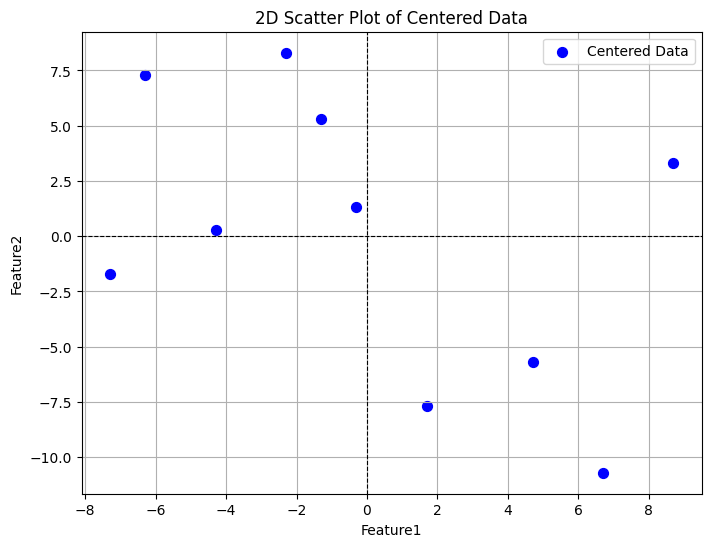

In [8]:
import matplotlib.pyplot as plt

# Compute the mean of each feature
mean = df[['Feature1', 'Feature2']].mean()

# Center the data by subtracting the mean
df_centered = df[['Feature1', 'Feature2']] - mean

# Scatter plot of the centered data
plt.figure(figsize=(8, 6))
plt.scatter(df_centered['Feature1'], df_centered['Feature2'], c='b', marker='o', s=50, label='Centered Data')

plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')

plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('2D Scatter Plot of Centered Data')
plt.grid(True)
plt.legend()
plt.show()


### Step 2: Finding the best fitting line for PC1
The algorithm evaluates multiple lines to find the best-suited line for representing the data variance along PC1.

Condition for the **Best-Suited Line**:
The best-suited line is the one that maximizes the projection of the data points onto it while minimizing the perpendicular distances from the data points to the line. Let's understand it using the **Pythagorean theorem**:
$$ a^2 = b^2 + c^2 $$


a: The total variance of the centered data.

b: The variance along the best-fitting line.

c: The variance perpendicular to the PC1 line.

Based on the formula, when b is larger, c is smaller, vice versa. This explain the PC1 line maximizes the distance of the data points onto it while minimizing the perpendicular distances from the data points to the line.


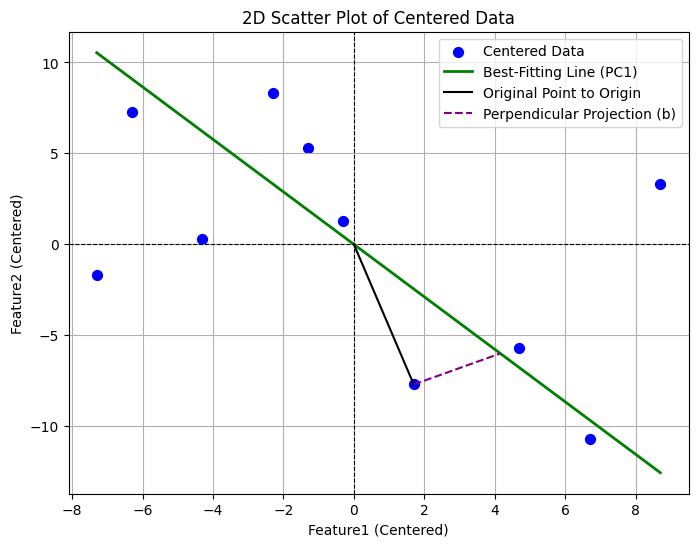

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Center the data
mean = df[['Feature1', 'Feature2']].mean()
df_centered = df[['Feature1', 'Feature2']] - mean

# Perform PCA on the centered data
pca = PCA(n_components=2)
pca.fit(df_centered)

#Take a point (6th) as an example
sixth_point = df_centered.iloc[5].values

# PC1 direction vector
pc1_direction = pca.components_[0]

# Projection of the data point onto the PC1 line
projection_length = np.dot(sixth_point, pc1_direction)
pc1_projection = projection_length * pc1_direction

perpendicular_projection = sixth_point - pc1_projection

plt.figure(figsize=(8, 6))
plt.scatter(df_centered['Feature1'], df_centered['Feature2'], c='b', marker='o', s=50, label='Centered Data')

# Plot the best-fitting line along PC1
x_vals = np.linspace(df_centered['Feature1'].min(), df_centered['Feature1'].max(), 100)
y_vals = pca.components_[0, 1] / pca.components_[0, 0] * x_vals  # Line equation for PC1
plt.plot(x_vals, y_vals, color='green', linewidth=2, label='Best-Fitting Line (PC1)')

# Draw the triangle using the  point
plt.plot([0, sixth_point[0]], [0, sixth_point[1]], color='black', linestyle='-', label='Original Point to Origin')

plt.plot([sixth_point[0], pc1_projection[0]], [sixth_point[1], pc1_projection[1]], color='purple', linestyle='--', label='Perpendicular Projection (b)')

plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')

plt.xlabel('Feature1 (Centered)')
plt.ylabel('Feature2 (Centered)')
plt.title('2D Scatter Plot of Centered Data')
plt.grid(True)
plt.legend()
plt.show()


Based on the graph shown above, we take a sample data point to illustrate the pythagorean theorem. The black solid line represents the distance from the data point to the origin, which corresponds to "a" in the Pythagorean theorem formula. The green solid line represents the best-fitting line of the first principal component (PC1), which captures the direction of maximum variance in the data, and it is corresponds to "c" in the Pythagorean theorem. The purple dotted line represents the perpendicular projection of the data point onto the PC1 line, corresponding to "b" in the Pythagorean theorem.

The PCA algorithm seeks to maximize the variance along the green solid line, ensuring that the data is projected in the direction where the spread is greatest. On the other hand, the PCA algorithm minimizes the dotted purple line, reducing the variance that lies outside the PC1 direction.

### Step 3: Project data onto the PC1 line
Now, we project all data points onto the best fitting line found (PC1)

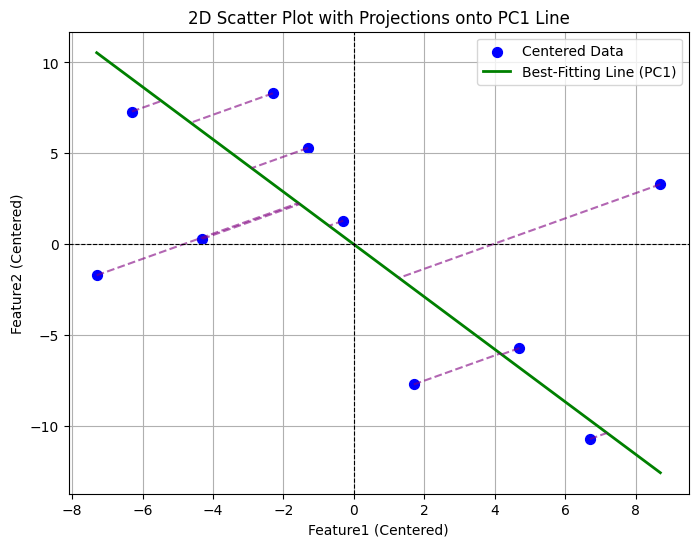

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Center the data
mean = df[['Feature1', 'Feature2']].mean()
df_centered = df[['Feature1', 'Feature2']] - mean

# Perform PCA on the centered data
pca = PCA(n_components=2)
pca.fit(df_centered)

# PC1 direction vector
pc1_direction = pca.components_[0]

# Plot the data and the PC1 line
plt.figure(figsize=(8, 6))
plt.scatter(df_centered['Feature1'], df_centered['Feature2'], c='b', marker='o', s=50, label='Centered Data')

# Plot the best-fitting line along PC1
x_vals = np.linspace(df_centered['Feature1'].min(), df_centered['Feature1'].max(), 100)
y_vals = pca.components_[0, 1] / pca.components_[0, 0] * x_vals  # Line equation for PC1
plt.plot(x_vals, y_vals, color='green', linewidth=2, label='Best-Fitting Line (PC1)')

# Loop through each data point to  draw projections onto the PC1 line
for idx, point in df_centered.iterrows():
    data_point = point[['Feature1', 'Feature2']].values
    projection_length = np.dot(data_point, pc1_direction)
    pc1_projection = projection_length * pc1_direction

    plt.plot([data_point[0], pc1_projection[0]], [data_point[1], pc1_projection[1]], color='purple', linestyle='--', alpha=0.6)

plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')

plt.xlabel('Feature1 (Centered)')
plt.ylabel('Feature2 (Centered)')
plt.title('2D Scatter Plot with Projections onto PC1 Line')
plt.grid(True)
plt.legend()
plt.show()

### Step 4: Calculate Sum of Squared Distances
The below graph shows an example of calculating the distance from one point to the origin in yellow dotted line. This steps is repeated for all points. After that, we squared all these values, so that nagative valus in graph does not cancalled out those positive values. Then, the squared values are all summed up, can this is called **"Sum of Squared Distances"**. Lastly, the lined is rotated to find the line with the **largest Sum of Squared Distances**, and that line will be the **Principal Component 1 (PC1)**.

By looking at the slope of the line, for example: 0.25
we can identified how the data spread out according to x-axis (feature1) and y-axis (feature2). The bigger ratio of data spread out on a certain feature indicates the more important the feature. Mathematicians call this ratio as **"linear combination"**.

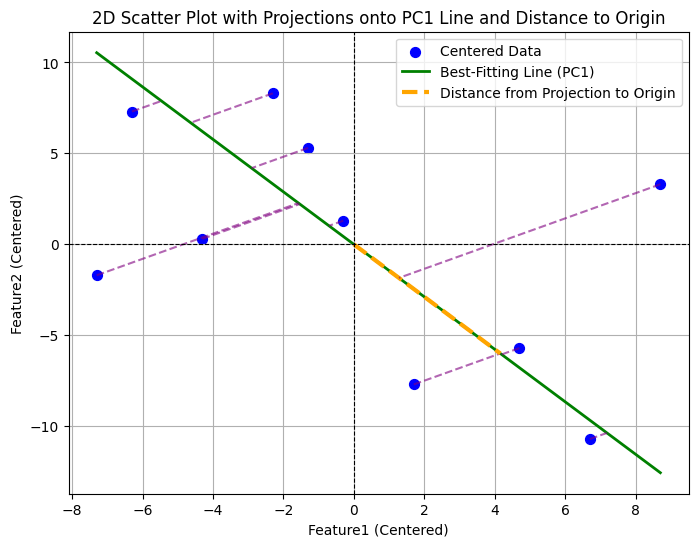

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Center the data
mean = df[['Feature1', 'Feature2']].mean()
df_centered = df[['Feature1', 'Feature2']] - mean

# Perform PCA on the centered data
pca = PCA(n_components=2)
pca.fit(df_centered)

# PC1 direction vector
pc1_direction = pca.components_[0]

# Plot the data and the PC1 line
plt.figure(figsize=(8, 6))
plt.scatter(df_centered['Feature1'], df_centered['Feature2'], c='b', marker='o', s=50, label='Centered Data')

# Plot the best-fitting line along PC1
x_vals = np.linspace(df_centered['Feature1'].min(), df_centered['Feature1'].max(), 100)
y_vals = pca.components_[0, 1] / pca.components_[0, 0] * x_vals  # Line equation for PC1
plt.plot(x_vals, y_vals, color='green', linewidth=2, label='Best-Fitting Line (PC1)')

# Loop through each data point to draw projections onto the PC1 line
for idx, point in df_centered.iterrows():
    data_point = point[['Feature1', 'Feature2']].values
    projection_length = np.dot(data_point, pc1_direction)
    pc1_projection = projection_length * pc1_direction

    plt.plot([data_point[0], pc1_projection[0]], [data_point[1], pc1_projection[1]], color='purple', linestyle='--', alpha=0.6)

    # For the sixth data point, draw the distance from the projected point to the origin
    if idx == 5:
        plt.plot([0, pc1_projection[0]], [0, pc1_projection[1]], color='orange', linestyle='--', alpha=1.0, linewidth=3, label='Distance from Projection to Origin')

plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')

plt.xlabel('Feature1 (Centered)')
plt.ylabel('Feature2 (Centered)')
plt.title('2D Scatter Plot with Projections onto PC1 Line and Distance to Origin')
plt.grid(True)
plt.legend()
plt.show()


In PCA, each principal component (PC) corresponds to a direction along which the data shows the greatest variance. This direction is defined by a **singular vector** or **eigenvector**, which represents the axis of greatest spread in the data. These eigenvectors are derived from the singular value decomposition (SVD) or the eigenvalue decomposition of the data matrix.

- A low eigenvalue indicates the component explains less of the variance in the data, a high eigenvalue indicates the corresponding principal component explains more amount of data variance.

$$
\text{Eigen Value for PC1:} \quad \lambda_1 = \frac{\sum (\text{Squared Distance})}{n-1}
$$

- The singular vector associated with PC1 is the same as the eigenvector in PCA. It defines the direction along which the variance is maximized.

- The singular value is related to the magnitude of the variance explained by the principal component. It is the square root of the eigenvalue and represents the "spread" or "magnitude" of the data along that principal component.

$$
\text{Singular Value for PC1:} \quad \sigma_1 = \sqrt{\sum (\text{Squared Distance})}
$$

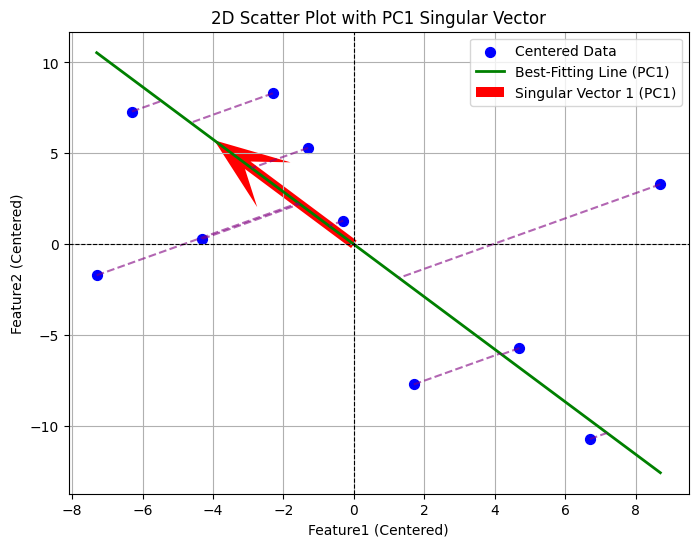

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Center the data
mean = df[['Feature1', 'Feature2']].mean()
df_centered = df[['Feature1', 'Feature2']] - mean

# Perform PCA
pca = PCA(n_components=2)
pca.fit(df_centered)

# Extract PC1 direction
pc1_direction = pca.components_[0]  # This is a unit vector

# Define vector length for visualization
vector_length = max(df_centered.max()) * 0.8
pc1_vector = pc1_direction * vector_length

# Plot Data
plt.figure(figsize=(8, 6))
plt.scatter(df_centered['Feature1'], df_centered['Feature2'], c='b', marker='o', s=50, label='Centered Data')

# Best-fitting line (PC1)
x_vals = np.linspace(df_centered['Feature1'].min(), df_centered['Feature1'].max(), 100)
y_vals = (pc1_direction[1] / pc1_direction[0]) * x_vals
plt.plot(x_vals, y_vals, color='green', linewidth=2, label='Best-Fitting Line (PC1)')

# Show Singular Vector (PC1)
origin = np.array([0, 0])
plt.quiver(*origin, *pc1_vector, color='red', scale=1, scale_units='xy', angles='xy',
           width=0.015, headwidth=6, headlength=8, label='Singular Vector 1 (PC1)')

# Projection Lines
for _, point in df_centered.iterrows():
    data_point = point[['Feature1', 'Feature2']].values
    projection_length = np.dot(data_point, pc1_direction)
    pc1_projection = projection_length * pc1_direction

    plt.plot([data_point[0], pc1_projection[0]], [data_point[1], pc1_projection[1]],
             color='purple', linestyle='--', alpha=0.6)

plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')

plt.xlabel('Feature1 (Centered)')
plt.ylabel('Feature2 (Centered)')
plt.title('2D Scatter Plot with PC1 Singular Vector')

plt.grid(True)
plt.legend()
plt.show()


### Calculating PC2
PC2 is just the line passing through the origin and is perpendicular to PC1. If we have more features, PC3 is just the line perpendicular to PC1 and PC2.

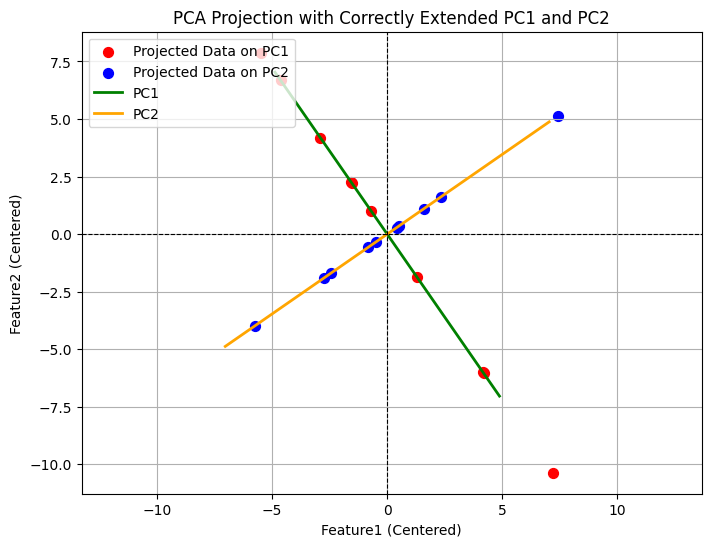

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Center the data
mean = df[['Feature1', 'Feature2']].mean()
df_centered = df[['Feature1', 'Feature2']] - mean

# Perform PCA
pca = PCA(n_components=2)
pca.fit(df_centered)

# Extract PC1 and PC2 directions
pc1_direction = pca.components_[0]
pc2_direction = pca.components_[1]

# Define vector length
vector_length = np.max(np.abs(df_centered.values)) * 0.8

# PC1 line
pc1_start = -pc1_direction * vector_length
pc1_end = pc1_direction * vector_length

# PC2 line
pc2_start = -pc2_direction * vector_length
pc2_end = pc2_direction * vector_length

# Project data onto PC1 and PC2
projections_pc1 = np.dot(df_centered[['Feature1', 'Feature2']], pc1_direction)[:, np.newaxis] * pc1_direction
projections_pc2 = np.dot(df_centered[['Feature1', 'Feature2']], pc2_direction)[:, np.newaxis] * pc2_direction

plt.figure(figsize=(8, 6))

# Projected data points on PC1
plt.scatter(projections_pc1[:, 0], projections_pc1[:, 1], c='red', marker='o', s=50, label='Projected Data on PC1')

# Projected data points on PC2
plt.scatter(projections_pc2[:, 0], projections_pc2[:, 1], c='blue', marker='o', s=50, label='Projected Data on PC2')

# Plot PC1 line
plt.plot([pc1_start[0], pc1_end[0]], [pc1_start[1], pc1_end[1]], color='green', linewidth=2, label='PC1')

# Plot PC2 line
plt.plot([pc2_start[0], pc2_end[0]], [pc2_start[1], pc2_end[1]], color='orange', linewidth=2, label='PC2')

plt.axis('equal')

plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')

plt.xlabel('Feature1 (Centered)')
plt.ylabel('Feature2 (Centered)')
plt.title('PCA Projection with Correctly Extended PC1 and PC2')

plt.grid(True)
plt.legend(loc='upper left')
plt.show()


### Final PCA Plot
To get the final transformed PCA plot, we simply rotate the whole graph to make the PC1 line to become horizontal, and use PC1 and PC2 to project the points.

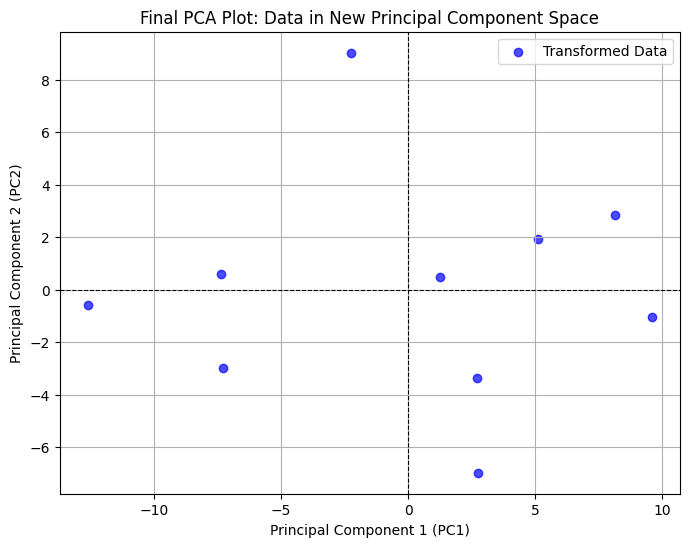

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

df_centered = df[['Feature1', 'Feature2']] - df[['Feature1', 'Feature2']].mean()

# Perform PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(df_centered)  # Get transformed coordinates

# Scatter plot of PCA-transformed data
plt.figure(figsize=(8, 6))
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c='b', marker='o', alpha=0.7, label='Transformed Data')

# Label axes according to PC1 and PC2
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('Final PCA Plot: Data in New Principal Component Space')

plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.grid(True)
plt.legend()

plt.show()


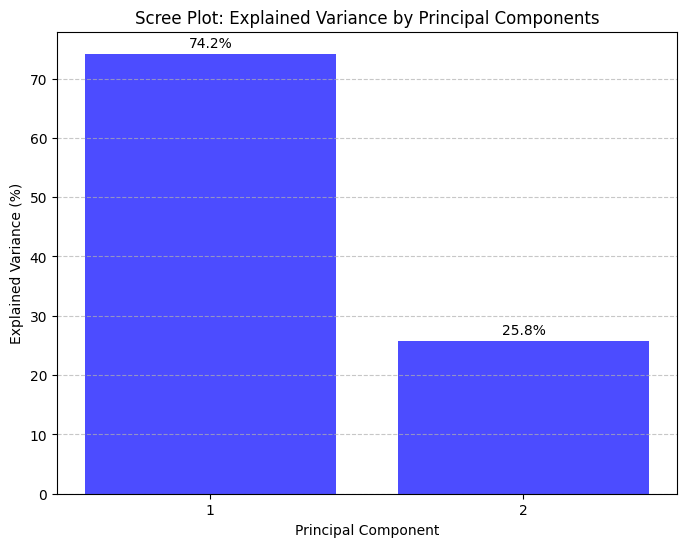

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

df_centered = df[['Feature1', 'Feature2']] - df[['Feature1', 'Feature2']].mean()

# Perform PCA
pca = PCA()
pca.fit(df_centered)

# Get explained variance ratio
explained_variance = pca.explained_variance_ratio_ * 100  # Convert to percentage

# Plot Scree Plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='blue')

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.title('Scree Plot: Explained Variance by Principal Components')

for i, var in enumerate(explained_variance):
    plt.text(i + 1, var + 1, f"{var:.1f}%", ha='center', fontsize=10)


plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## 4.0 Working in Real-World Dataset
The dataset used in this section is obtained from Kaggle. It contains 17 columns and more than 2000 rows

Dataset link: https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels
### 4.1 Data Exploration

In [16]:
from google.colab import files

df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
print(df.head())

    Age  Gender  Height  Weight        CALC FAVC  FCVC  NCP  SCC SMOKE  CH2O  \
0  21.0  Female    1.62    64.0          no   no   2.0  3.0   no    no   2.0   
1  21.0  Female    1.52    56.0   Sometimes   no   3.0  3.0  yes   yes   3.0   
2  23.0    Male    1.80    77.0  Frequently   no   2.0  3.0   no    no   2.0   
3  27.0    Male    1.80    87.0  Frequently   no   3.0  3.0   no    no   2.0   
4  22.0    Male    1.78    89.8   Sometimes   no   2.0  1.0   no    no   2.0   

  family_history_with_overweight  FAF  TUE       CAEC                 MTRANS  \
0                            yes  0.0  1.0  Sometimes  Public_Transportation   
1                            yes  3.0  0.0  Sometimes  Public_Transportation   
2                            yes  2.0  1.0  Sometimes  Public_Transportation   
3                             no  2.0  0.0  Sometimes                Walking   
4                             no  0.0  0.0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Norm

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

### 4.2 Dataset Explanation
This dataset contains information for estimating the occurrence of obesity in people from Mexico, Peru, and Colombia based on their physical characteristics and eating patterns.

Columns:

Gender: Gender of the person

Age : Age of the person

Height: Height of the person

Weight: Weight of the person

family_history_with_overweight: Has a family member suffered or suffers from overweight?

FAVC : Do you eat high caloric food frequently?

FCVC : Do you usually eat vegetables in your meals?

NCP : How many main meals do you have daily?

CAEC : Do you eat any food between meals?

SMOKE : Do you smoke?

CH2O: How much water do you drink daily?

SCC: Do you monitor the calories you eat daily?

FAF: How often do you have physical activity?

TUE : How much time do you use technological devices such as cell phone, videogames, television, computer and others?

CALC : How often do you drink alcohol?

MTRANS : Which transportation do you usually use?

NObeyesdad : Obesity level

**We will rename these columns in EDA Section**

In [18]:
print(df.describe())

               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75% 

### 4.3 Data Preprocessing


###Check missing value

In [19]:
df.isnull().sum()

,0
Age,0
Gender,0
Height,0
Weight,0
CALC,0
FAVC,0
FCVC,0
NCP,0
SCC,0
SMOKE,0


### 4.4 Check duplicated value

In [20]:
print("Total duplicated rows: ", sum(df.duplicated()))

Total duplicated rows:  24


In [21]:
duplicated_rows = df[df.duplicated()]
print("Duplicated rows:")
print(duplicated_rows)

Duplicated rows:
      Age  Gender  Height  Weight       CALC FAVC  FCVC  NCP SCC SMOKE  CH2O  \
98   21.0  Female    1.52    42.0  Sometimes   no   3.0  1.0  no    no   1.0   
106  25.0  Female    1.57    55.0  Sometimes  yes   2.0  1.0  no    no   2.0   
174  21.0    Male    1.62    70.0  Sometimes  yes   2.0  1.0  no    no   3.0   
179  21.0    Male    1.62    70.0  Sometimes  yes   2.0  1.0  no    no   3.0   
184  21.0    Male    1.62    70.0  Sometimes  yes   2.0  1.0  no    no   3.0   
209  22.0  Female    1.69    65.0  Sometimes  yes   2.0  3.0  no    no   2.0   
309  16.0  Female    1.66    58.0         no   no   2.0  1.0  no    no   1.0   
460  18.0  Female    1.62    55.0         no  yes   2.0  3.0  no    no   1.0   
467  22.0    Male    1.74    75.0         no  yes   3.0  3.0  no    no   1.0   
496  18.0    Male    1.72    53.0  Sometimes  yes   2.0  3.0  no    no   2.0   
527  21.0  Female    1.52    42.0  Sometimes  yes   3.0  1.0  no    no   1.0   
659  21.0  Female    1.

In [22]:
df = df.drop_duplicates(keep='first')

print("\nTotal duplicated rows after dropping: ", sum(df.duplicated()))


Total duplicated rows after dropping:  0


In [23]:
df.isnull().sum()

,0
Age,0
Gender,0
Height,0
Weight,0
CALC,0
FAVC,0
FCVC,0
NCP,0
SCC,0
SMOKE,0


### 4.5 Exploratory Data Analysis (EDA)

Convert binary data into 1 and 0

In [24]:
# Convert 'Gender' to binary: Male = 1, Female = 0
df['Gender'] = df['Gender'].map({"Male": 1, "Female": 0})

# Replace 'yes' and 'no' with 1 and 0
df['family_history_with_overweight'] = df['family_history_with_overweight'].replace({'yes': 1, 'no': 0}).astype('int')
df['FAVC'] = df['FAVC'].replace({'yes': 1, 'no': 0}).astype('int')
df['SMOKE'] = df['SMOKE'].replace({'yes': 1, 'no': 0}).astype('int')

# Ensure the 'Gender' column is of type integer
df['Gender'] = df['Gender'].astype('int')


<ipython-input-24-d4e2bead7aca>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['family_history_with_overweight'] = df['family_history_with_overweight'].replace({'yes': 1, 'no': 0}).astype('int')
<ipython-input-24-d4e2bead7aca>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['FAVC'] = df['FAVC'].replace({'yes': 1, 'no': 0}).astype('int')
<ipython-input-24-d4e2bead7aca>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `resu

In [25]:
# Print each value count
print(df['Gender'].value_counts())
print(df['family_history_with_overweight'].value_counts())
print(df['FAVC'].value_counts())
print(df['SMOKE'].value_counts())
print(df['SCC'].value_counts())


Gender
1    1052
0    1035
Name: count, dtype: int64
family_history_with_overweight
1    1722
0     365
Name: count, dtype: int64
FAVC
1    1844
0     243
Name: count, dtype: int64
SMOKE
0    2043
1      44
Name: count, dtype: int64
SCC
no     1991
yes      96
Name: count, dtype: int64


Renaming columns for better understanding

In [26]:
# Rename columns
df.rename(columns={
    'FAVC': 'High_Caloric_Food_Consumption',
    'FCVC': 'Vegetable_Consumption',
    'NCP': 'Number_of_Main_Meals',
    'CAEC': 'Food_Between_Meals',
    'CH2O': 'Water_Intake',
    'SCC': 'Calorie_Monitoring',
    'FAF': 'Physical_Activity_Frequency',
    'TUE': 'Digital_Device_Time',
    'CALC': 'Alcohol_Consumption_Frequency',
    'MTRANS': 'Transportation_Mode',
    'NObeyesdad': 'Obesity_Level'
}, inplace=True)

print(df.head())

    Age  Gender  Height  Weight Alcohol_Consumption_Frequency  \
0  21.0       0    1.62    64.0                            no   
1  21.0       0    1.52    56.0                     Sometimes   
2  23.0       1    1.80    77.0                    Frequently   
3  27.0       1    1.80    87.0                    Frequently   
4  22.0       1    1.78    89.8                     Sometimes   

   High_Caloric_Food_Consumption  Vegetable_Consumption  Number_of_Main_Meals  \
0                              0                    2.0                   3.0   
1                              0                    3.0                   3.0   
2                              0                    2.0                   3.0   
3                              0                    3.0                   3.0   
4                              0                    2.0                   1.0   

  Calorie_Monitoring  SMOKE  Water_Intake  family_history_with_overweight  \
0                 no      0           2.0    

One-Hot Encoding

In [27]:
# Identify all categorical columns except 'Obesity_Level'
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns[categorical_columns != 'Obesity_Level']

# Apply one-hot encoding to selected columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


In [28]:
df.dtypes

,0
Age,float64
Gender,int64
Height,float64
Weight,float64
High_Caloric_Food_Consumption,int64
Vegetable_Consumption,float64
Number_of_Main_Meals,float64
SMOKE,int64
Water_Intake,float64
family_history_with_overweight,int64


In [29]:
#Copy two version of dataframe for comparison use later
pca_df_no_pca = df.copy()
pca_df_with_pca = df.copy()


### 4.6 Model without PCA
We will first visualize the performance for the model (Logistic Regression) without PCA used.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = pca_df_no_pca.drop('Obesity_Level', axis=1)  # All features except the target column
y = pca_df_no_pca['Obesity_Level']  # Target column

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
clf = LogisticRegression(random_state=42)

# Train the Logistic Regression model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Print classification report
print(classification_report(y_test, y_pred))


Model Accuracy: 0.8589
                     precision    recall  f1-score   support

Insufficient_Weight       0.87      0.92      0.89        59
      Normal_Weight       0.83      0.74      0.78        61
     Obesity_Type_I       0.91      0.89      0.90        70
    Obesity_Type_II       0.97      1.00      0.98        64
   Obesity_Type_III       0.98      1.00      0.99        60
 Overweight_Level_I       0.73      0.65      0.69        55
Overweight_Level_II       0.66      0.78      0.71        49

           accuracy                           0.86       418
          macro avg       0.85      0.85      0.85       418
       weighted avg       0.86      0.86      0.86       418



In [31]:
# Identify boolean columns
categorical_cols = pca_df_with_pca.select_dtypes(include=['bool']).columns

# Convert boolean to integers (0 and 1)
pca_df_with_pca[categorical_cols] = pca_df_with_pca[categorical_cols].astype(int)

### 4.7 Model using PCA
Now, we repeat the process of modelling but apply PCA

Number of principal components: 21

Explained Variance Ratio per Component: [0.13766017 0.09105615 0.0821271  0.07479854 0.05697166 0.05514175
 0.05145959 0.05004934 0.0449889  0.0434602  0.04061779 0.03899623
 0.03680236 0.03496867 0.03343267 0.03127955 0.02651402 0.02631631
 0.01736414 0.01300101 0.00884183]

Total Variance Explained by Selected Components: 0.9958479861689162


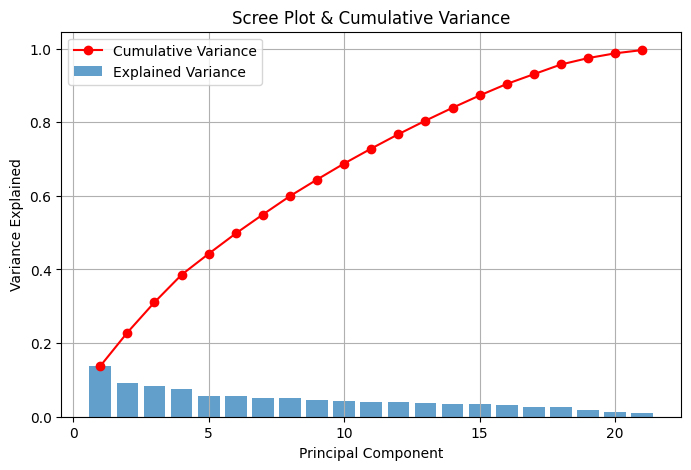

Model Accuracy: 0.8612
                     precision    recall  f1-score   support

Insufficient_Weight       0.86      0.93      0.89        59
      Normal_Weight       0.85      0.74      0.79        61
     Obesity_Type_I       0.91      0.89      0.90        70
    Obesity_Type_II       0.97      1.00      0.98        64
   Obesity_Type_III       0.98      1.00      0.99        60
 Overweight_Level_I       0.75      0.65      0.70        55
Overweight_Level_II       0.66      0.78      0.71        49

           accuracy                           0.86       418
          macro avg       0.85      0.86      0.85       418
       weighted avg       0.86      0.86      0.86       418



In [32]:
from sklearn.decomposition import PCA

# Separate features and target variable
X = pca_df_with_pca.drop('Obesity_Level', axis=1)  # All features except the target column
y = pca_df_with_pca['Obesity_Level']  # Target column

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.99)  # Keep 99% of the variance
X_pca = pca.fit_transform(X_scaled)

# Get the number of selected components
n_selected_components = pca.n_components_

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Print number of selected components
print(f"Number of principal components: {n_selected_components}")

# Print explained variance ratio
print("\nExplained Variance Ratio per Component:", explained_variance_ratio)
print("\nTotal Variance Explained by Selected Components:", cumulative_variance[-1])


# Scree Plot with Comulative Variance
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, label='Explained Variance')
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', linestyle='-', color='r', label='Cumulative Variance')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot & Cumulative Variance')
plt.legend()
plt.grid()
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
clf = LogisticRegression(random_state=42)

# Train the Logistic Regression model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Print classification report
print(classification_report(y_test, y_pred))


Based on the performance of the models with and without PCA, we can see that the model is performing slightly better with PCA, which has slightly higher accuracy.

However, it is important to note that using **PCA does not guarantee that the accuracy will always be higher** than when not using it. PCA works by reducing the dimensionality of the dataset, which can help remove noise and capture the most important variance in the data. This often leads to improved model performance, especially when the **original features are highly correlated** or when the **dataset contains a large number of columns with redundant information**.

On the other hand, if the original features contain important and distinct information that is lost during the dimensionality reduction process, PCA might result in a decrease in model accuracy. Therefore, while PCA can be a useful technique for improving performance, its effectiveness depends on the **nature of the dataset** and the **objectives** we aim to achieve.

### 4.8 Visualize Important Features for Each Principal Components
In python, we can visualize the features that contribute the most in each principal components, so that we can get insights into which variables have the greatest influence on the reduced dimensions.

In [33]:
# Create a DataFrame with feature contributions to each PC
feature_contributions = pd.DataFrame(pca.components_, columns=X.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])

# Display Top 5 Most Important Features for PC1 and PC2
print(f"Important Features for PC1")
print(feature_contributions.loc['PC1'].abs().sort_values(ascending=False).head(5))
print(f"\nImportant Features for PC1")
print(feature_contributions.loc['PC2'].abs().sort_values(ascending=False).head(5))


Important Features for PC1
Weight                            0.440429
Food_Between_Meals_Sometimes      0.393278
Food_Between_Meals_Frequently     0.369926
family_history_with_overweight    0.322966
Height                            0.301741
Name: PC1, dtype: float64

Important Features for PC1
Alcohol_Consumption_Frequency_Sometimes      0.487997
Alcohol_Consumption_Frequency_no             0.442964
Gender                                       0.387684
Transportation_Mode_Public_Transportation    0.311627
Physical_Activity_Frequency                  0.285791
Name: PC2, dtype: float64


### 4.9 Mean Squared Error (MSE) in PCA Reconstruction
MSE calculates the average squared difference between the dataset's actual values and its predicted values. In this topic, it is able to tells us how much information is lost when reducing dimensions using PCA.

Low MSE means good reconstruction as it indicates less information loss; while hight MSE means poor reconstructions as it indicates important information are loss

$
MSE = \frac{1}{n} \sum_{i=1}^{n} (X_{\text{original}, i} - X_{\text{reconstructed}, i})^2
$

Where:
- $X_{\text{original}, i} $ = The original value for the i-th sample and feature
- $ X_{\text{reconstructed}, i} $ = The reconstructed value for the i-th sample and feature
- $ n $ = The total number of data points

In [34]:
# Reduce dimensions and reconstruct back
pca = PCA(n_components=21)
X_pca = pca.fit_transform(X_scaled)
X_reconstructed = pca.inverse_transform(X_pca)

# Compute Reconstruction Loss (MSE)
reconstruction_error = np.mean((X_scaled - X_reconstructed) ** 2)
print(f'Reconstruction Error: {reconstruction_error:.4f}')


Reconstruction Error: 0.0042


In [35]:
# Get Eigenvectors (Principal Axes)
eigenvectors = pca.components_

# Get Eigenvalues (Variance per Component)
eigenvalues = pca.explained_variance_

# Print the first few components
print("Eigenvectors (Principal Components):\n", eigenvectors[:2])
print("\nEigenvalues:\n", eigenvalues[:2])


Eigenvectors (Principal Components):
 [[ 0.15155094  0.18600278  0.30174137  0.44042869  0.24571583  0.0342096
   0.075165   -0.00122261  0.14384663  0.32296601 -0.02846472 -0.03873006
  -0.05503529  0.24164634 -0.22602854 -0.19454149 -0.36992636  0.39327823
  -0.10149773 -0.00365442 -0.04688257 -0.04950335 -0.07790306]
 [-0.13642335 -0.38768421 -0.28299464  0.02630139  0.06471394  0.19025344
  -0.03598723 -0.03585647 -0.07987977 -0.13304085 -0.28579103 -0.06422213
  -0.14737711  0.48799658 -0.44296392  0.05436232  0.02900819 -0.02503455
   0.04331061 -0.09149879 -0.04976442  0.31162696 -0.16470683]]

Eigenvalues:
 [3.1677017  2.09529543]


## References
- Obesity Levels. (2025). Kaggle. https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels
- StatQuest with Josh Starmer. (2018, April 2). StatQuest: Principal Component Analysis (PCA), Step-by-Step [Video]. YouTube. https://www.youtube.com/watch?v=FgakZw6K1QQ
- GeeksforGeeks. (2024, September 20). Variance. GeeksforGeeks. https://www.geeksforgeeks.org/variance/
- Hayes, A. (2024, June 5). What is a mean? types and formulas. Investopedia. https://www.investopedia.com/terms/m/mean.asp#:~:text=The%20mean%20is%20another%20word,by%20the%20number%20of%20observations.